In [20]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer


In [29]:
#We Load the Breast Cancer Dataset

#The load_breast_cancer() function from sklearn.datasets provides the breast cancer dataset.

from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()

# Display dataset keys
print("Keys in the dataset:", data.keys())

Keys in the dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [31]:
# To understand the size of the dataset using data.shape.
# Check shape of the feature matrix
print("Shape of the feature matrix (data):", data.data.shape)

# Check shape of the target vector
print("Shape of the target vector (target):", data.target.shape)

Shape of the feature matrix (data): (569, 30)
Shape of the target vector (target): (569,)


In [32]:
#Convert the dataset into a pandas DataFrame for easier exploration
import pandas as pd

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column
df['target'] = data.target

In [35]:
#Use pd.DataFrame.describe() to summarize the dataset.
# Statistical summary of the dataset
print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [37]:
#Print the list of features to understand the dataset better.
print("Feature Names:", data.feature_names)

Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [38]:
#Check the distribution of the target variable
# Display target names
print("Target Names:", data.target_names)

# Count occurrences of each class
print("Target Distribution:")
print(df['target'].value_counts())

Target Names: ['malignant' 'benign']
Target Distribution:
target
1    357
0    212
Name: count, dtype: int64


In [41]:
##Standardize the dataset to ensure that all features contribute equally to the PCA.
#Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Standardize the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [14]:
#Reduce the dataset into 2 components.

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Convert the PCA components into a DataFrame
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])

# Add target labels for visualization
pca_df['target'] = data.target

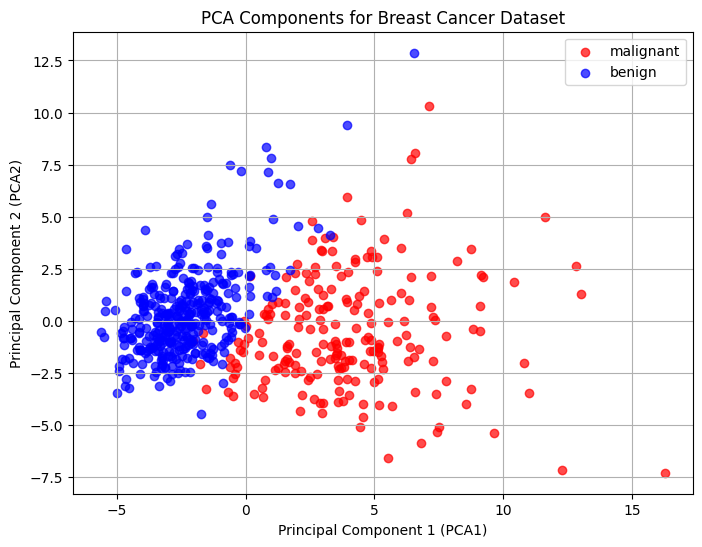

In [21]:
# Visualize the PCA Components
import matplotlib.pyplot as plt
# Plot the PCA components
plt.figure(figsize=(8, 6))
for target, color, label in zip([0, 1], ['red', 'blue'], data.target_names):
    subset = pca_df[pca_df['target'] == target]
    plt.scatter(subset['PCA1'], subset['PCA2'], color=color, label=label, alpha=0.7)

plt.title('PCA Components for Breast Cancer Dataset')
plt.xlabel('Principal Component 1 (PCA1)')
plt.ylabel('Principal Component 2 (PCA2)')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
#Explained Variance Ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained:", sum(pca.explained_variance_ratio_))


Explained Variance Ratio: [0.44896035 0.18472104]
Total Variance Explained: 0.633681390940986


In [43]:
##Implement Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features and target
X = pca_df[['PCA1', 'PCA2']]
y = pca_df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 455
Testing samples: 114


In [25]:
#Train the Logistic Regression Model
# Initialize the model
logreg = LogisticRegression(random_state=42)

# Train the model
logreg.fit(X_train, y_train)

print("Logistic Regression Model Trained Successfully")

Logistic Regression Model Trained Successfully


In [26]:
# Make predictions on the test data
y_pred = logreg.predict(X_test)

In [28]:
#Evaluate the model’s performance using accuracy, confusion matrix, and classification report
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred, target_names=data.target_names)
print("Classification Report:")
print(class_report)

Accuracy: 0.99
Confusion Matrix:
[[42  1]
 [ 0 71]]
Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.98      0.99        43
      benign       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

